# SVM for regression

In [28]:
import pickle
from sklearn.preprocessing import scale

In [29]:
X_train, y_train = pickle.load(open( "../datasets/cadata.pickle", "rb" ))
first_rows = 2000

In [30]:
# https://scikit-learn.org/stable/modules/preprocessing.html

X_train = scale(X_train[:first_rows,:].toarray())
y_train = y_train[:first_rows]/10**4.0

## Tuning SVM

In [49]:
from sklearn.svm import SVC
from sklearn.grid_search import RandomizedSearchCV
from sklearn.datasets import load_svmlight_file

X_train, y_train = load_svmlight_file('../datasets/ijcnn1.bz2')
first_rows = 2500

print(type(X_train))

<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:

X_train, y_train = X_train[:first_rows,:], y_train[:first_rows]

hypothesis = SVC(kernel='rbf', random_state=101)

search_dict = {'C': [0.01, 0.1, 1, 10, 100],'gamma': [0.1, 0.01, 0.001, 0.0001]}

search_func = RandomizedSearchCV(   estimator=hypothesis,
                                    param_distributions=search_dict, 
                                    n_iter=10, 
                                    scoring='accuracy',
                                    n_jobs=-1, 
                                    iid=True, 
                                    refit=True, 
                                    cv=5, 
                                    random_state=101 )

search_func.fit(X_train, y_train)
print ('Best parameters %s' % search_func.best_params_)
print ('Cross validation accuracy: mean = %0.3f' % search_func.best_score_)

## Ensemble strategies

In [55]:
import pickle

covertype_dataset = pickle.load(open( "../datasets/covertype_dataset.pickle","rb" ))
print (covertype_dataset.DESCR)

covertype_X = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]
covertypes = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine','Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']


Forest covertype dataset.

A classic dataset for classification benchmarks, featuring categorical and
real-valued features.

The dataset page is available from UCI Machine Learning Repository

    http://archive.ics.uci.edu/ml/datasets/Covertype

Courtesy of Jock A. Blackard and Colorado State University.



In [81]:
import numpy as np
import timeit

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [82]:
%%time 
hypothesis = RandomForestClassifier(n_estimators=100,random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y,cv=3, scoring='accuracy', n_jobs=-1)
print ("RandomForestClassifier -> cross validation accuracy:mean = %0.3f \
std = %0.3f" % (np.mean(scores), np.std(scores)))

RandomForestClassifier -> cross validation accuracy:mean = 0.809 std = 0.009
Wall time: 9 s


In [83]:
%%time 
hypothesis = ExtraTreesClassifier(n_estimators=100, random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3,scoring='accuracy', n_jobs=-1)
print ("ExtraTreesClassifier -> cross validation accuracy:mean = %0.3f \
std = %0.3f" % (np.mean(scores), np.std(scores)))

ExtraTreesClassifier -> cross validation accuracy:mean = 0.821 std = 0.009
Wall time: 10 s


In [84]:
import pickle
from sklearn.preprocessing import scale
import numpy as np
from sklearn.ensemble import RandomForestRegressor

X_train, y_train = pickle.load(open( "../datasets/cadata.pickle", "rb" ))
first_rows = 2000

X_train = scale(X_train[:first_rows,:].toarray())
y_train = y_train[:first_rows]/10**4.

In [85]:
hypothesis = RandomForestRegressor(n_estimators=300, random_state=101)
scores = cross_val_score(hypothesis, X_train, y_train, cv=3,scoring='mean_absolute_error', n_jobs=-1)
print ("RandomForestClassifier -> cross validation accuracy: mean = %0.3f \std = %0.3f" % (np.mean(scores), np.std(scores)))

RandomForestClassifier -> cross validation accuracy: mean = -4.642 \std = 0.514


## Estimating probabilities from an ensemble

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

hypothesis = RandomForestClassifier(n_estimators=100, random_state=101)
calibration = CalibratedClassifierCV(hypothesis, method='sigmoid', cv=5)
covertype_X = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]
covertype_test_X = covertype_dataset.data[15000:25000,:]
covertype_test_y = covertype_dataset.target[15000:25000]

In [87]:
hypothesis.fit(covertype_X,covertype_y)
calibration.fit(covertype_X,covertype_y)
prob_raw = hypothesis.predict_proba(covertype_test_X)
prob_cal = calibration.predict_proba(covertype_test_X)

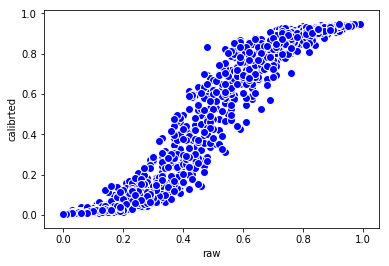

In [88]:
%matplotlib inline
tree_kind = covertypes.index('Ponderosa Pine')
probs = pd.DataFrame(list(zip(prob_raw[:,tree_kind],prob_cal[:,tree_kind])),columns=['raw','calibrted'])
plot = probs.plot(kind='scatter', x=0, y=1, s=64, c='blue',edgecolors='white')

In [89]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

hypothesis = AdaBoostClassifier(n_estimators=300, random_state=101)

scores = cross_val_score(hypothesis, 
                         covertype_X, 
                         covertype_y, 
                         cv=3,scoring='accuracy', 
                         n_jobs=-1)

print ("Adaboost -> cross validation accuracy: mean = %0.3f \std = %0.3f" % (np.mean(scores), np.std(scores)))

Adaboost -> cross validation accuracy: mean = 0.622 \std = 0.006
